<a href="https://colab.research.google.com/github/skandanyal/Machine-Learning-course/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


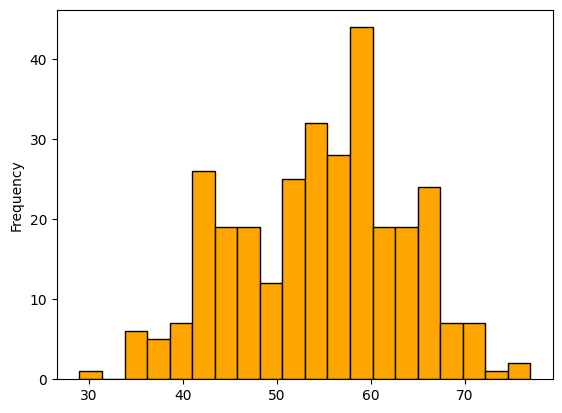

In [9]:
# distribution of ages
# heart_disease.plot(x='age', kind='histogram')
%matplotlib inline
heart_disease['age'].plot.hist(bins=20, color='orange', edgecolor='black');
plt.show()

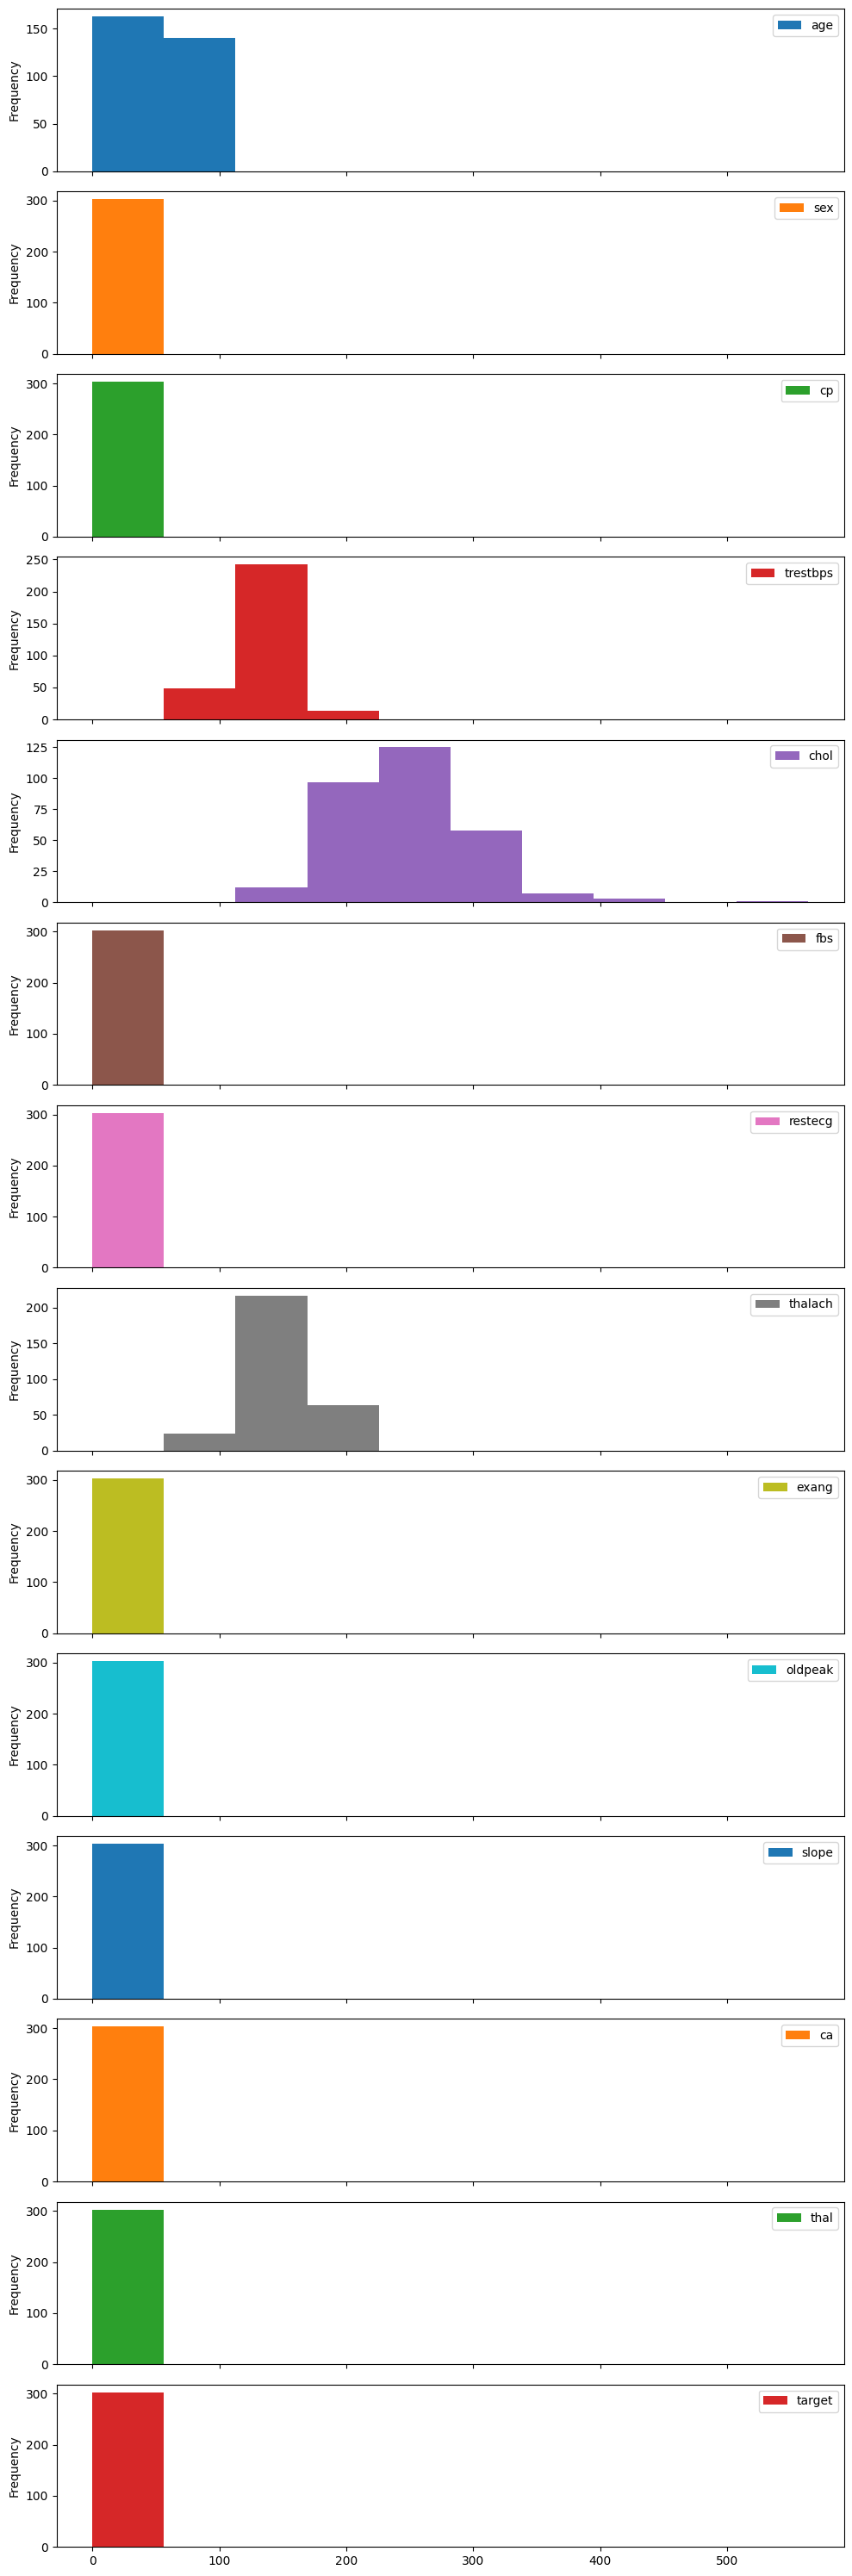

In [10]:
heart_disease.plot.hist(figsize=(10,30), subplots=True); # not very efficient
plt.tight_layout()
plt.show()

## Which one should you use? (call pyplot or use OO method)

* When plotting smtg quickly, use pyplot
* When plotting something advanced, use OO method

## Working with data of patients who are above the age of 50

In [5]:
over_50 = heart_disease[heart_disease['age']>=50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='chol'>

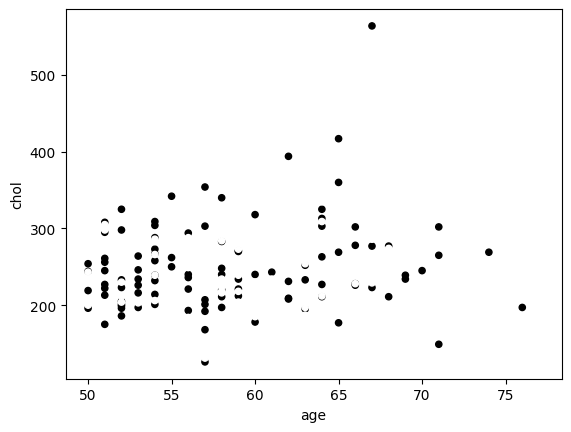

In [7]:
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c=over_50['target'])

<Axes: xlabel='age', ylabel='chol'>

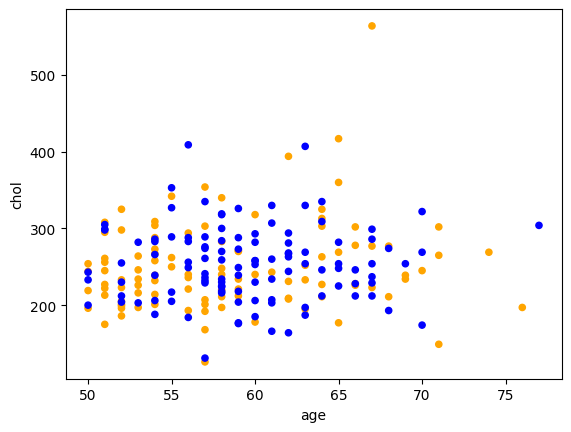

In [8]:
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c=['orange' if b else 'blue' for b in over_50['target']])

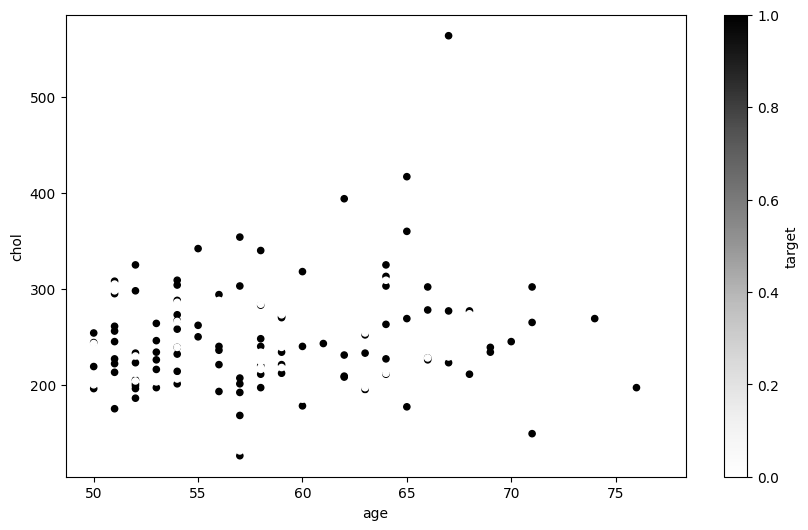

In [13]:
# OO method mixed with pyplot
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind = 'scatter',
             x = 'age',
             y = 'chol',
             c = 'target',
             ax = ax);

#ax.set_xlim([40,100])

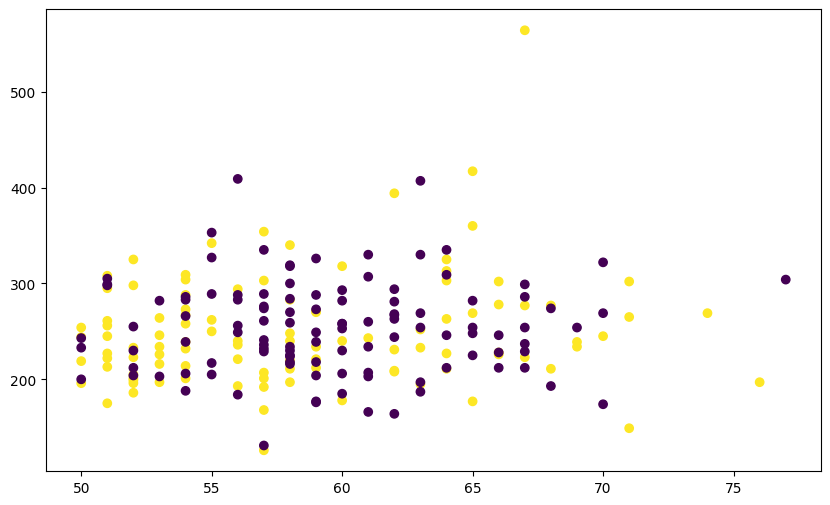

In [14]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x = over_50.age,
                     y = over_50.chol,
                     c = over_50.target)

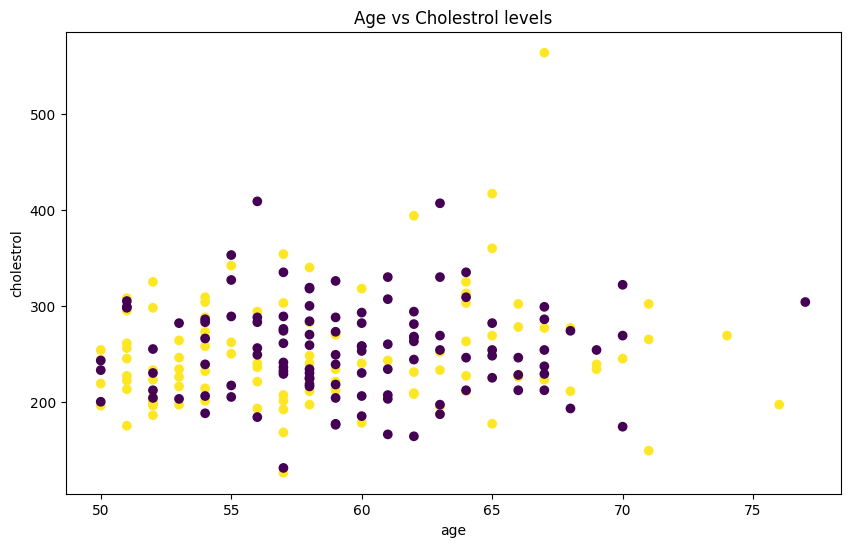

In [16]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x = over_50.age,
                     y = over_50.chol,
                     c = over_50.target)

# ----------

# customize
ax.set(title = 'Age vs Cholestrol levels',
       xlabel = 'age',
       ylabel = 'cholestrol');

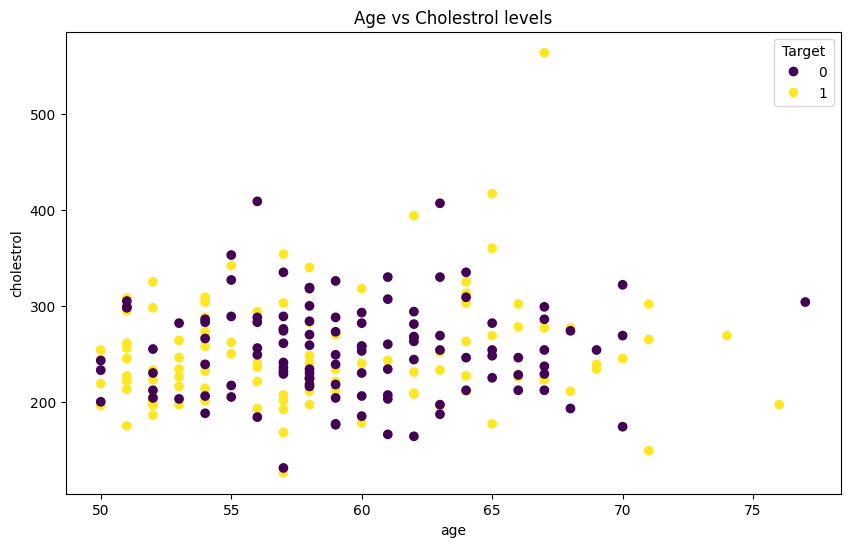

In [17]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x = over_50.age,
                     y = over_50.chol,
                     c = over_50.target)

# customize
ax.set(title = 'Age vs Cholestrol levels',
       xlabel = 'age',
       ylabel = 'cholestrol');

# ------------------------

# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

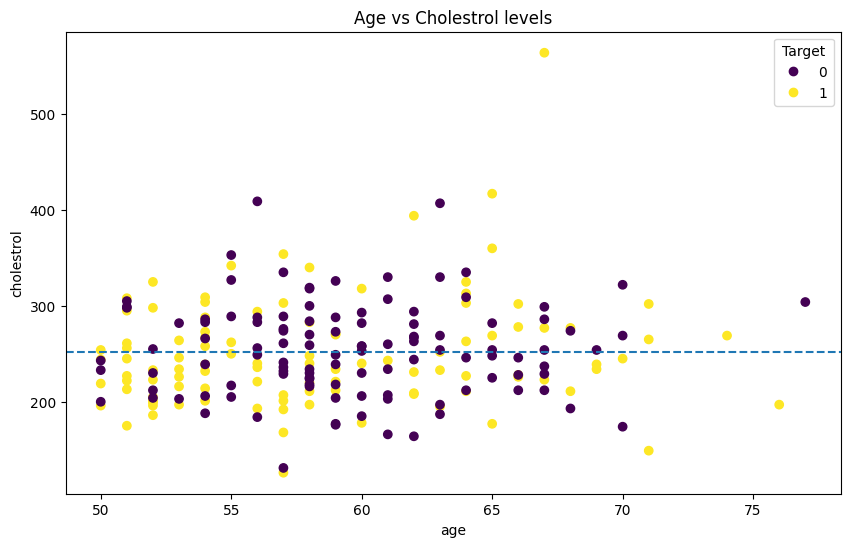

In [19]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x = over_50.age,
                     y = over_50.chol,
                     c = over_50.target)

# customize
ax.set(title = 'Age vs Cholestrol levels',
       xlabel = 'age',
       ylabel = 'cholestrol');

# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# ----------------

# add a horizontle line
ax.axhline(over_50.chol.mean(),
           linestyle = '--');

## Subplot of chol, age, thalach

In [20]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


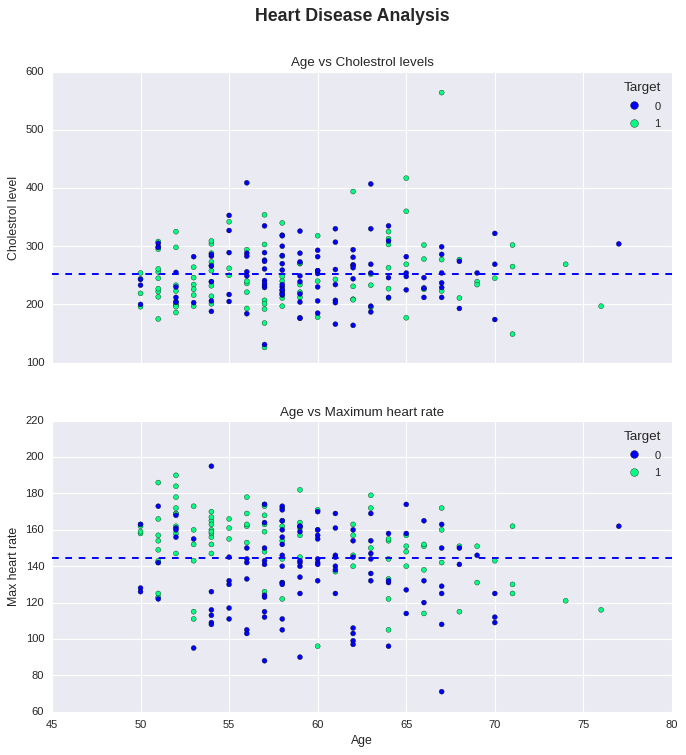

In [56]:
# subplot of age vs chol, age vs thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True);

# add data to ax0
scatter1 = ax0.scatter(x=over_50.age,
                       y=over_50.chol,
                       c=over_50.target,
                       cmap='winter');

# customize ax0
ax0.set(ylabel='Cholestrol level',
        title='Age vs Cholestrol levels');

# set the legend to ax0
ax0.legend(*scatter1.legend_elements(), title='Target');

# add a mean line
ax0.axhline(over_50.chol.mean(),
            ls='--');

# add data to ax1
scatter2 = ax1.scatter(x=over_50.age,
                       y=over_50.thalach,
                       c=over_50.target,
                       cmap='winter');

# customize
ax1.set(xlabel='Age',
        ylabel='Max heart rate',
        title='Age vs Maximum heart rate');

# add legend to ax1
ax1.legend(*scatter2.legend_elements(),
           title = 'Target');

# add a mean line
ax1.axhline(over_50.thalach.mean(),
            ls='--');

# add a title to the entire figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## Customizing **Matplotlib** plots and getting stylish

In [32]:
# Looking at different styles in matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [35]:
plt.style.use('seaborn-v0_8-whitegrid')

<Axes: >

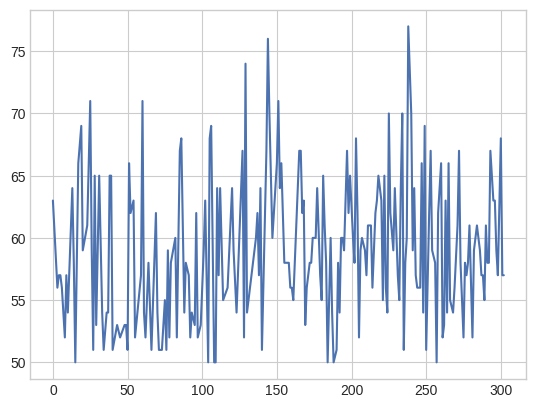

In [36]:
over_50.age.plot()

<Axes: >

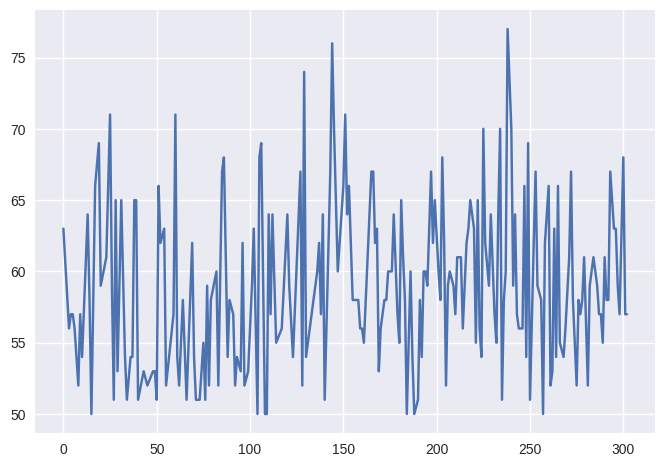

In [39]:
plt.style.use('seaborn-v0_8')
over_50.age.plot()

<Axes: xlabel='age', ylabel='chol'>

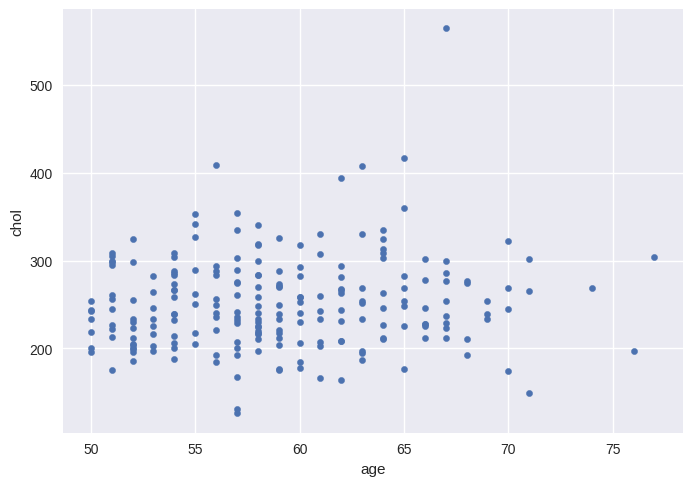

In [42]:
over_50.plot(x='age',
                 y='chol',
                 kind='scatter')

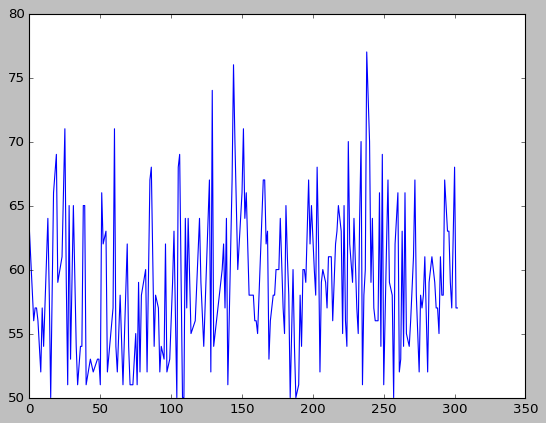

In [44]:
plt.style.use('classic')
over_50.age.plot();

## Practice more using some dummy data

In [45]:
x = np.random.rand(10,4)
x

array([[0.2807325 , 0.64518471, 0.55020578, 0.4638628 ],
       [0.35384014, 0.43356953, 0.20445003, 0.05509054],
       [0.33551146, 0.21601972, 0.90437083, 0.1642499 ],
       [0.47440829, 0.53493253, 0.30468613, 0.91558117],
       [0.84625984, 0.01216215, 0.56206433, 0.76698054],
       [0.95629102, 0.18152333, 0.39356762, 0.22186864],
       [0.33622024, 0.4782734 , 0.2127144 , 0.46785344],
       [0.09246698, 0.4101715 , 0.89477791, 0.966255  ],
       [0.10018435, 0.25940792, 0.73047158, 0.90481456],
       [0.93545306, 0.79406097, 0.91066444, 0.56809524]])

In [46]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.280732,0.645185,0.550206,0.463863
1,0.353840,0.433570,0.204450,0.055091
2,0.335511,0.216020,0.904371,0.164250
3,0.474408,0.534933,0.304686,0.915581
4,0.846260,0.012162,0.562064,0.766981
5,0.956291,0.181523,0.393568,0.221869
6,0.336220,0.478273,0.212714,0.467853
7,0.092467,0.410171,0.894778,0.966255
8,0.100184,0.259408,0.730472,0.904815
9,0.935453,0.794061,0.910664,0.568095


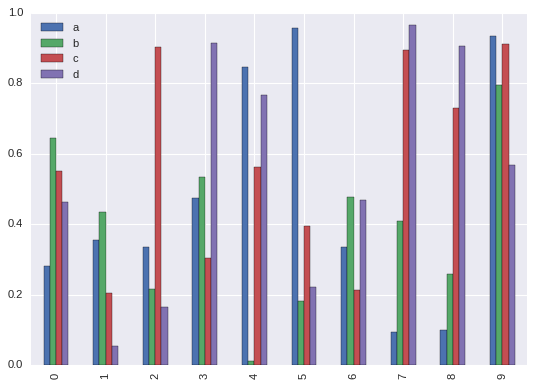

In [47]:
plt.style.use('seaborn-v0_8')
ax = df.plot(kind='bar')

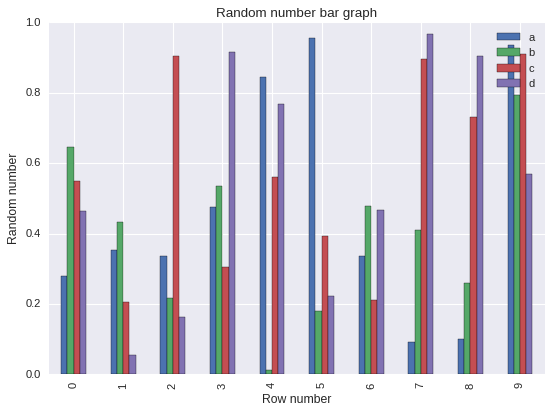

In [49]:
plt.style.use('seaborn-v0_8')
ax = df.plot(kind='bar')

# customize the plot using set() method
ax.set(title="Random number bar graph",
       xlabel='Row number',
       ylabel='Random number')
ax.legend().set_visible(True)

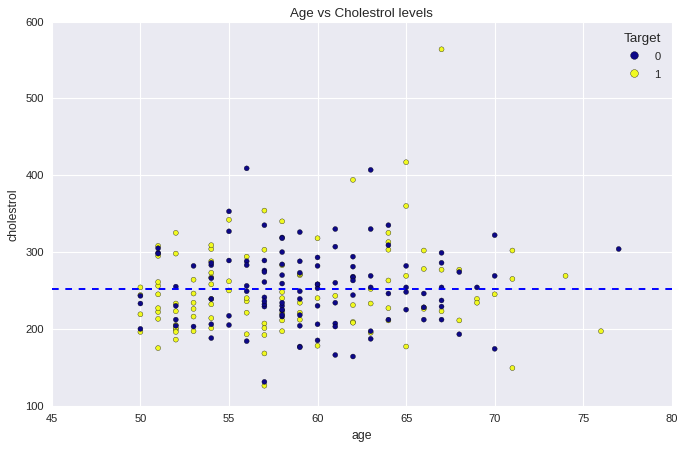

In [55]:
plt.style.use('seaborn-v0_8')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x = over_50.age,
                     y = over_50.chol,
                     c = over_50.target,
                     cmap='plasma')

# customize
ax.set(title = 'Age vs Cholestrol levels',
       xlabel = 'age',
       ylabel = 'cholestrol');

# add a legend
ax.legend(*scatter.legend_elements(), title='Target');

# ----------------

# add a horizontle line
ax.axhline(over_50.chol.mean(),
           linestyle = '--');

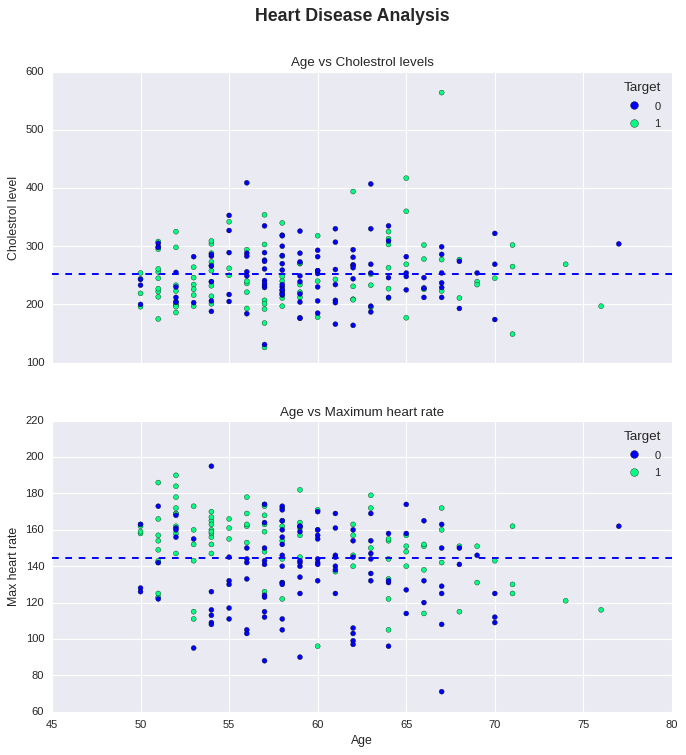

In [59]:
fig
#fig.savefig('heart-disease-plot-using-code.png')